In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
sigmoid = lambda x:  1 / (1 + np.exp(-x))
d_sigmoid = lambda x: x * (1 - x)

In [52]:
SE = lambda a, y_est: (y_est - a)**2
d_SE = lambda a, y_est: 2*(y_est - a)

In [14]:
X = np.array([[1,0,], [0,1]])
y = np.array([[0,1]]).T
X = X[0]
y = y[0]

np.random.seed(17)
w1 = np.random.rand(2,3)
w2 = np.random.rand(3,1)

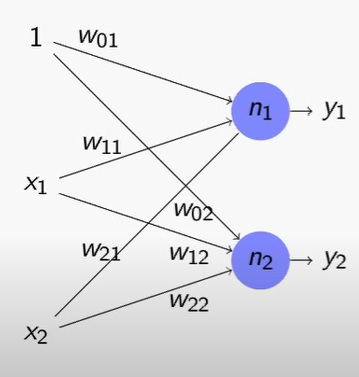

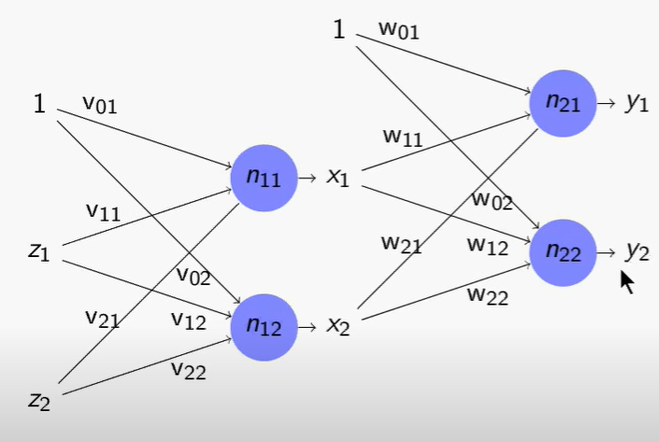

# Forward

In [18]:
print(X) #входные нейроны
print(y) #выходной нейрон

[1 0]
[0]


In [19]:
w1 #связи между нейронами ji, входные нейроны j, выходные i 

array([[0.294665  , 0.53058676, 0.19152079],
       [0.06790036, 0.78698546, 0.65633352]])

$y_1 = f_{activation}(w_{11} \cdot x_1 + w_{21} \cdot x_2)$

$y_2 = 𝑓_{𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑖𝑜𝑛}(w_{12} \cdot x_1 + w_{22} \cdot x_2)$

$y_3 = 𝑓_{𝑎𝑐𝑡𝑖𝑣𝑎𝑡𝑖𝑜𝑛}(w_{13} \cdot x_1 + w_{23} \cdot x_2)$

$f_{activation}(\begin{pmatrix}
  x_{1} & x_{2}\\
\end{pmatrix} \cdot
\begin{pmatrix}
  w_{11} & w_{12} & w_{13}\\
  w_{21} & w_{22} & w_{23}\\
\end{pmatrix}) = \begin{pmatrix}
  f_{activation}(u_{1}) & f_{activation}(u_{2}) & f_{activation}(u_{3})\\
\end{pmatrix} = \begin{pmatrix}
  y_{1} & y_{2} & y_{3}\\
\end{pmatrix}$

In [30]:
layer_1 = sigmoid(X @ w1)
layer_1 #3 нейрона

array([0.57313782, 0.62961995, 0.54773438])

In [23]:
print(w1[0][0]) #w11
print(w1[0][1]) #w12
print(w1[0][2]) #w13

0.2946650026871097
0.5305867556052941
0.19152078694749486


In [24]:
print(w1[1][0]) #w21
print(w1[1][1]) #w22
print(w1[1][2]) #w23

0.06790035819129137
0.7869854599999133
0.6563335217758555


In [31]:
sigmoid(X[0] * w1[0][0] + X[1] * w1[1][0]) #layer_1[0] первый нейрон

0.5731378173079986

Выходы предыдущего слоя -- входы следующего, повторяется та же операция, пока не надоест

In [34]:
w2 #связи 3 нейронов предыдущего слоя с одним выходным нейроном

array([[0.6375209 ],
       [0.57560289],
       [0.03906292]])

$y_{output} = f_{activation}(y_1 \cdot w_{11} + y_2 \cdot w_{21} + y_3 \cdot w_{31})$

In [43]:
sigmoid(layer_1[0] * w2[0] + layer_1[1] * w2[1] + layer_1[2] * w2[2])

array([0.67900316])

In [45]:
layer_2 = sigmoid(layer_1 @ w2)
layer_2

array([0.67900316])

Зачем нам вообще промежуточные функции layer_1 и layer_2? Можно просто перемножить X и последующие матрицы весов?
Чтобы можно было произвести операции обратного распространения ошибки

In [48]:
sigmoid(sigmoid(X @ w1) @ w2) #тот же рузультат, но здесь мы не записываем значения промежуточных функций - слоёв

array([0.67900316])

У нас один выход сети

$$SE(y) = (y - y_{real})^2$$

In [56]:
SE(y, layer_2) #среднеквадратичная ошибка сети

array([0.46104529])

# Backward

Движемся в обратном направлении с конца

$$\frac{\partial SE}{\partial y} = 2(y-y_{real})$$

In [60]:
d_se_layer_2 = d_SE(y, layer_2)
d_se_layer_2

array([1.35800632])

## Расчёт градиента для весов слоя

$$\frac{\partial SE}{\partial w_{ji}} = \frac{\partial SE}{\partial y_i}\frac{\partial y_i}{\partial w_{ji}}$$

В нашем случае

$$\frac{\partial SE}{\partial w2_{11}} = \frac{\partial SE}{\partial layer2_1}\frac{\partial layer2_1}{\partial w2_{11}}$$

$$\frac{\partial SE}{\partial w2_{21}} = \frac{\partial SE}{\partial layer2_1}\frac{\partial layer2_1}{\partial w2_{21}}$$

$$\frac{\partial SE}{\partial w2_{31}} = \frac{\partial SE}{\partial layer2_1}\frac{\partial layer2_1}{\partial w2_{31}}$$

Это те же записи, что в **Forward**, в более общем виде

$U_i = x_{j(входы)}\cdot w_{i(веса)}$ - нейрон без функции активации, короче (ну или типа с линейной функцией активации)

$y_i = f_{activation}(U_i)$ - с функцией активации (выглядит как U, если функция активации линейная (ну тупо отсутствует))

$w_i = (w_{j1}, w_{j2} ... w_{ji})$ - связи с нейроном $y_i$

$x_j = (x_1, x_2 ... x_j)$ - входные нейроны

Частная производная для конкретного веса для одного выходного нейрона

$$\frac{\partial y_i}{\partial w_{ji}} = f_{activation}(U_i)' \cdot x_j = \frac{\partial y_i}{\partial U_i}\frac{\partial U_i}{\partial w_{ji}}$$


В нашем случае

$$U_i = layer1\cdot w2_{i}$$


$$\frac{\partial layer2_1}{\partial w_{11}} = f_{activation}(U_1)' \cdot layer1_1$$
$$\frac{\partial layer2_1}{\partial w_{21}} = f_{activation}(U_1)' \cdot layer1_2$$
$$\frac{\partial layer2_1}{\partial w_{31}} = f_{activation}(U_1)' \cdot layer1_3$$

Так как у нас всего один выходной нейрон и 3 входных: $i = 1, j \in [1,3]$

In [151]:
delta_w2 = layer_1.reshape(-1,1) @ (d_se_layer_2 * d_sigmoid(layer_2)).reshape(-1,1) #простое перемножение матриц
delta_w2 #градиент весов, число строк -- число выходных нейронов, число столбцов -- число входных нейронов

array([[0.16964201],
       [0.18636005],
       [0.16212289]])

In [78]:
w2

array([[0.6375209 ],
       [0.57560289],
       [0.03906292]])

In [149]:
w1

array([[0.294665  , 0.53058676, 0.19152079],
       [0.06790036, 0.78698546, 0.65633352]])

## Расчёт градиента следующего слоя

Нейроны следующего слоя назовём x, потому что выше он обозначался так же, когда был входным слоём

Для этого слоя расчет градиента весов такой же, как для предыдущего, и для последующих тоже

$$\frac{\partial SE}{\partial w_{ji}} = \frac{\partial SE}{\partial x_i}\frac{\partial x_i}{\partial w_{ji}}$$

Теперь у нас 3 выходных нейрона и 2 входных

$$\begin{pmatrix}
  \frac{\partial SE}{\partial w1_{11}} = \frac{\partial SE}{\partial layer1_1}\frac{\partial layer1_1}{\partial w1_{11}} & \frac{\partial SE}{\partial w1_{12}} = \frac{\partial SE}{\partial layer1_2}\frac{\partial layer1_2}{\partial w1_{12}} & \frac{\partial SE}{\partial w1_{13}} = \frac{\partial SE}{\partial layer1_3}\frac{\partial layer1_3}{\partial w1_{13}}\\
  \frac{\partial SE}{\partial w1_{21}} = \frac{\partial SE}{\partial layer1_1}\frac{\partial layer1_1}{\partial w1_{21}} & \frac{\partial SE}{\partial w1_{22}} = \frac{\partial SE}{\partial layer1_2}\frac{\partial layer1_2}{\partial w1_{22}} & \frac{\partial SE}{\partial w1_{23}} = \frac{\partial SE}{\partial layer1_3}\frac{\partial layer1_3}{\partial w1_{23}}\\
\end{pmatrix}$$


<!-- $$\frac{\partial SE}{\partial w1_{11}} = \frac{\partial SE}{\partial layer1_1}\frac{\partial layer1_1}{\partial w1_{11}}$$
$$\frac{\partial SE}{\partial w1_{12}} = \frac{\partial SE}{\partial layer1_2}\frac{\partial layer1_2}{\partial w1_{12}}$$
$$\frac{\partial SE}{\partial w1_{13}} = \frac{\partial SE}{\partial layer1_3}\frac{\partial layer1_3}{\partial w1_{13}}$$

$$\frac{\partial SE}{\partial w1_{21}} = \frac{\partial SE}{\partial layer1_1}\frac{\partial layer1_1}{\partial w1_{21}}$$
$$\frac{\partial SE}{\partial w1_{22}} = \frac{\partial SE}{\partial layer1_2}\frac{\partial layer1_2}{\partial w1_{22}}$$
$$\frac{\partial SE}{\partial w1_{23}} = \frac{\partial SE}{\partial layer1_3}\frac{\partial layer1_3}{\partial w1_{23}}$$ -->

In [76]:
w1

array([[0.294665  , 0.53058676, 0.19152079],
       [0.06790036, 0.78698546, 0.65633352]])

Но нужно найти $\frac{\partial SE}{\partial x_i}$ чтобы всё это рассчитать (остальное считается точно так же, как выше)

$$\frac{\partial SE}{\partial x_j} = \sum_{i=1}^{n}\frac{\partial SE}{\partial y_i}\frac{\partial y_i}{\partial x_j}$$

То есть на прошлом шаге помимо расчета градиента по весам, нужно рассчитать градиент и по входным нейронам

$$\frac{\partial y_i}{\partial w_{ji}} = f_{activation}(U_i)' \cdot x_j = \frac{\partial y_i}{\partial U_i}\frac{\partial U_i}{\partial w_{ji}}$$


$$\frac{\partial y_i}{\partial x_{j}} = f_{activation}(U_i)' \cdot w_{ji} = \frac{\partial y_i}{\partial U_i}\frac{\partial U_i}{\partial x_{j}}$$

В нашем случае, так как на прошлом слое всего 1 выходной нейрон (один $y$), то не нужно суммировать по $y_i$

$$\frac{\partial layer2}{\partial layer1_{1}} = f_{activation}(U_1)' \cdot w2_{11}$$

$$\frac{\partial layer2}{\partial layer1_{2}} = f_{activation}(U_1)' \cdot w2_{21}$$

$$\frac{\partial layer2}{\partial layer1_{3}} = f_{activation}(U_1)' \cdot w2_{31}$$

In [109]:
de_se_layer_1 = d_se_layer_2 * d_sigmoid(layer_2) @ w2.T
de_se_layer_1

array([0.18869864, 0.17037164, 0.01156216])

In [143]:
X

array([1, 0])

In [152]:
delta_w1 = X.reshape(-1,1) @ (de_se_layer_1 * d_sigmoid(layer_1)).reshape(1,-1)
delta_w1

array([[0.04616528, 0.03973044, 0.0028642 ],
       [0.        , 0.        , 0.        ]])

## Обновление весов 

lr - learning rate

$$w = w - lr \cdot \nabla w $$

In [154]:
w2 -= delta_w2
w1 -= delta_w1

In [155]:
w2

array([[ 0.46787889],
       [ 0.38924284],
       [-0.12305998]])

In [156]:
w1

array([[0.24849972, 0.49085632, 0.18865659],
       [0.06790036, 0.78698546, 0.65633352]])

# Запишем всё в одну функцию

Сгенерируем данные

In [167]:
np.random.seed(17)
xx = np.random.rand(20,2)

In [172]:
y = xx.argmax(1).reshape(-1,1)

In [176]:
SE(y,y).mean()

0.0

In [245]:
def learn_nn(xx, y, epochs, lr = 1):
    X = xx
    y = y
    w1 = np.random.rand(xx.shape[1],3)
    w2 = np.random.rand(3,1)
    
    mse_log = []
    for i in range(epochs):
        #forward
        layer_1 = sigmoid(X @ w1) 
        layer_2 = sigmoid(layer_1 @ w2)
        
        mse = SE(y, layer_2).mean()
        mse_log.append(mse)
#         print('mse: ', mse)
        
        #backward
        d_se_layer_2 = d_SE(y, layer_2)
        delta_w2 = layer_1.T @ (d_se_layer_2 * d_sigmoid(layer_2))
        
        de_se_layer_1 = d_se_layer_2 * d_sigmoid(layer_2) @ w2.T
        delta_w1 = X.T @ (de_se_layer_1 * d_sigmoid(layer_1))
        
        #обновление весов
        w2 -= lr * delta_w2
        w1 -= lr * delta_w1
             
        
    return mse_log, lambda x_ : sigmoid(sigmoid(x_ @ w1) @ w2)

In [246]:
mse_, nn = learn_nn(xx,y,1000, 0.01)

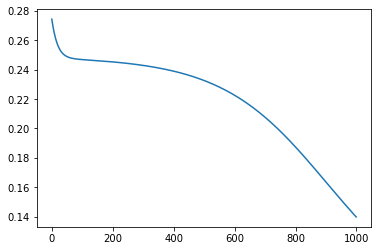

In [247]:
plt.plot(mse_)

In [248]:
def accuracy_score(y_real, y_pred):
    return np.sum(y_pred + y_real)/np.sum(y_real)/2

In [249]:
accuracy_score(y, nn(xx).round())

1.0

In [ ]:
Ы